Load the libraries below.

In [1]:
library("tidyverse")
library("jsonlite")
library("lubridate")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




This function `get_data` will get the new case counts over time from Utah.  

In [11]:
get_data = function(state_code) {
    
    state = state_code # two letter state code 
    
    endpoint = paste0("https://data.cdc.gov/resource/9mfq-cb36.json?state=", state)
    
    # Don't worry about this part for the moment👇
    df = fromJSON(url(endpoint)) %>% 
        mutate(date = as_date(submission_date),
               new_cases = as.numeric(new_case)) %>%
        select(date, new_cases, state) %>%
        arrange(date)
    
    return(df)
    
    }

In [13]:
df = get_data("WV")
df %>% head

,date,new_cases,state
,<date>,<dbl>,<chr>
1,2020-01-22,0,WV
2,2020-01-23,0,WV
3,2020-01-24,0,WV
4,2020-01-25,0,WV
5,2020-01-26,0,WV
6,2020-01-27,0,WV


Adjust the function above to take a state code as an argument and to set the `state` variable inside the function to the value of the argument.

Hint: here is an example of a function that just takes an argument called `state_code` and returns the value of the `state` variable.

```R
state_code_function = function(state_code) {
    
    state = state_code
    
    return(state)
    
}
```

Use your function to plot new cases over time for any state.

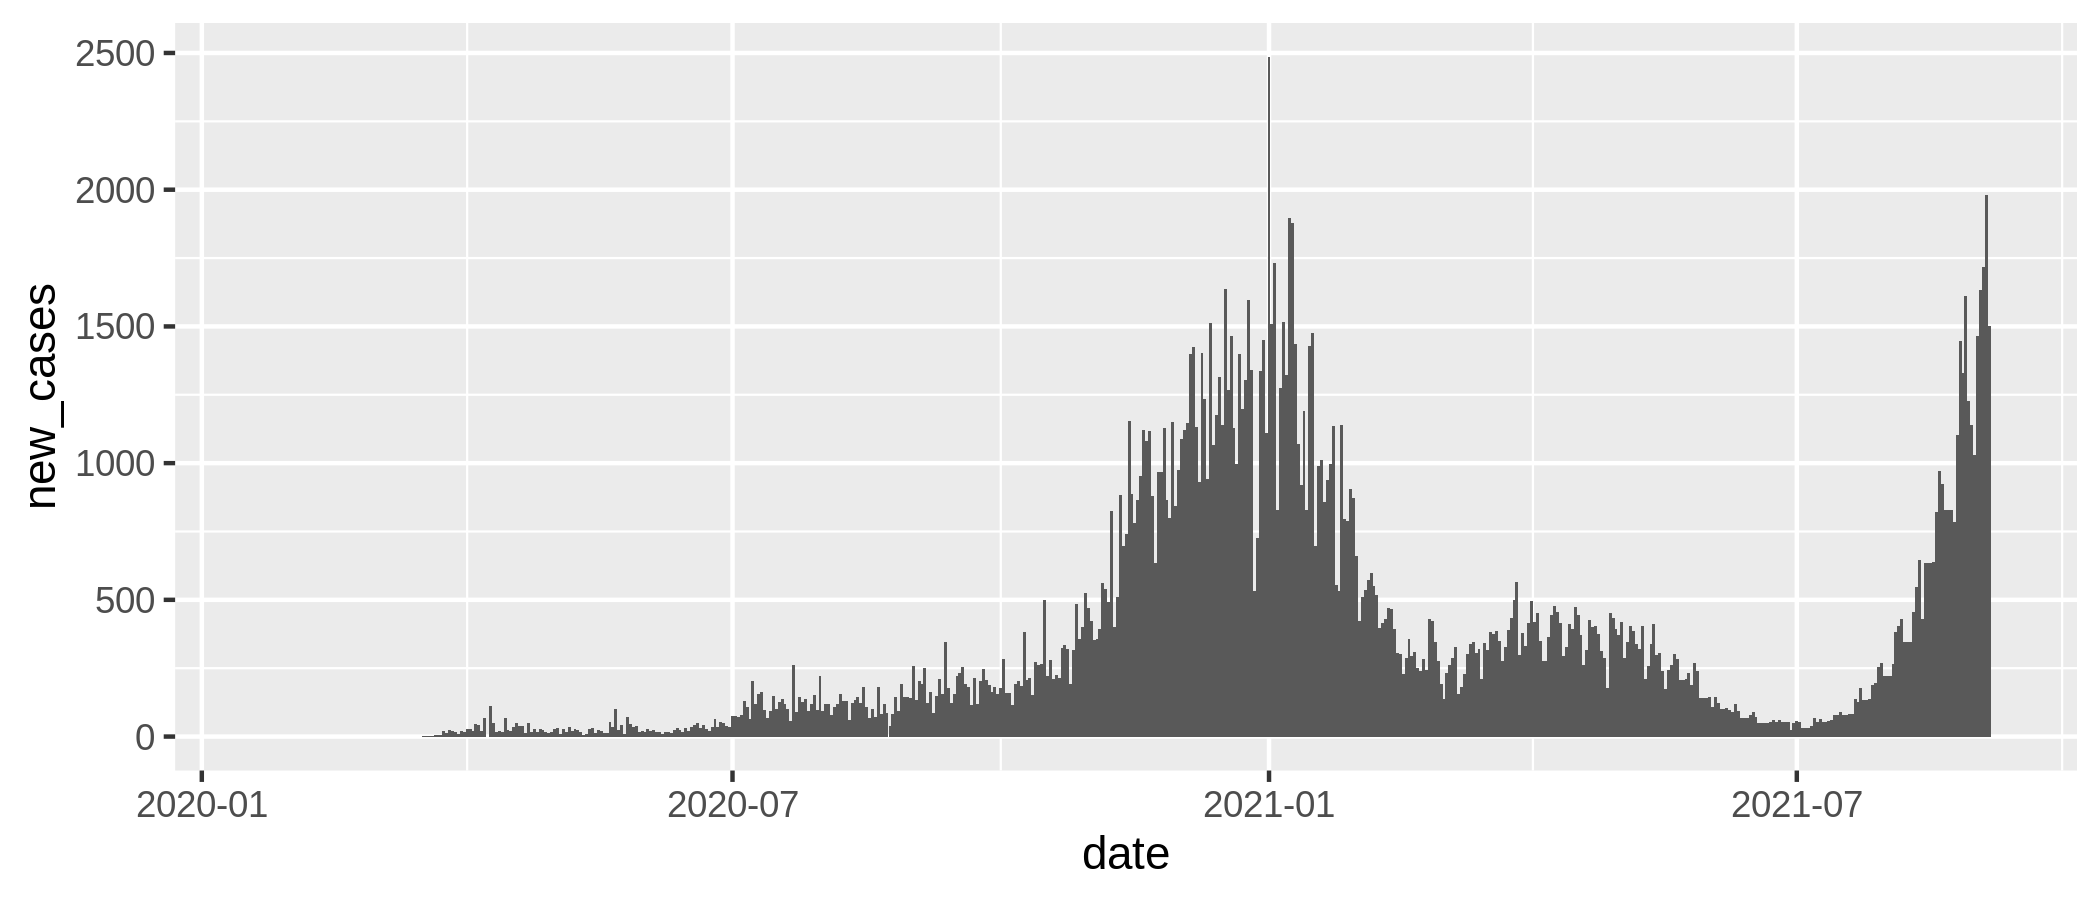

In [16]:
options(repr.plot.width=7, repr.plot.height=3, repr.plot.res=300)

df = get_data("WV")

p = ggplot(df, aes(x = date, y = new_cases))

p = p + geom_col(width = 1)

p
